In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import os
import glob

In [1]:
# Dataset
!gdown https://drive.google.com/uc?id=1TRMzHAQWx1XUMod84rstZXCntIiREWOl

Downloading...
From: https://drive.google.com/uc?id=1TRMzHAQWx1XUMod84rstZXCntIiREWOl
To: /content/car_license_plate.zip
100% 214M/214M [00:01<00:00, 154MB/s]


In [ ]:
import os
import zipfile
local_zip = '/content/car_license_plate.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
IMG_SIZE = 224

In [ ]:
img_dir = r"/content/car_license_plate/images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X = []
for img in files:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X.append(np.array(img))

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMG_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMG_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMG_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMG_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = "/content/car_license_plate/annotations"
text_files = ['/content/car_license_plate/annotations/'+ i for i in sorted(os.listdir(path))]
y = []
for i in text_files:
    y.append(resizeannotation(i))

In [ ]:
resizeannotation("/content/car_license_plate/annotations/Cars0.xml")

[187, 144, 101, 104]

In [ ]:
y[:5]

[[187, 144, 101, 104],
 [146, 144, 75, 115],
 [169, 147, 78, 4],
 [119, 109, 98, 95],
 [134, 164, 93, 150]]

In [ ]:
np.array(X).shape

(433, 224, 224, 3)

In [ ]:
np.array(y).shape

(433, 4)

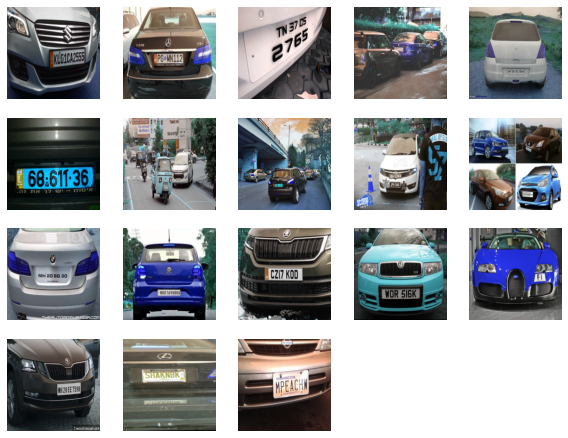

In [ ]:
plt.figure(figsize=(10,20))

for i in range(0,18):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

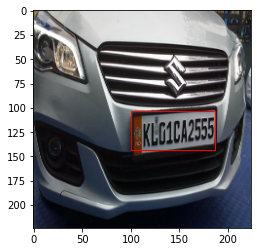

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

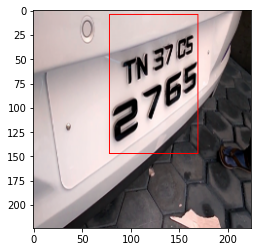

In [ ]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

In [ ]:
# Transforming the array to numpy array
X = np.array(X)
y = np.array(y)

In [ ]:
X = X/255
y = y/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)

In [ ]:
X_train.shape

(173, 224, 224, 3)

In [ ]:
X_test.shape

(87, 224, 224, 3)

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg19 import VGG19

In [ ]:
model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3211392   
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 4)                 260       
                                                                 
Total params: 23,260,804
Trainable params: 23,260,804


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 6s 734ms/step - loss: 0.0694 - accuracy: 0.4393 - val_loss: 0.0421 - val_accuracy: 0.4277
Epoch 2/100
6/6 [==============================] - 4s 660ms/step - loss: 0.0487 - accuracy: 0.2023 - val_loss: 0.0232 - val_accuracy: 0.4277
Epoch 3/100
6/6 [==============================] - 4s 656ms/step - loss: 0.0227 - accuracy: 0.4971 - val_loss: 0.0223 - val_accuracy: 0.5723
Epoch 4/100
6/6 [==============================] - 4s 663ms/step - loss: 0.0216 - accuracy: 0.5376 - val_loss: 0.0315 - val_accuracy: 0.4798
Epoch 5/100
6/6 [==============================] - 4s 665ms/step - loss: 0.0246 - accuracy: 0.4913 - val_loss: 0.0214 - val_accuracy: 0.5723
Epoch 6/100
6/6 [==============================] - 4s 663ms/step - loss: 0.0217 - accuracy: 0.5376 - val_loss: 0.0222 - val_accuracy: 0.5723
Epoch 7/100
6/6 [==============================] - 4s 667ms/step - loss: 0.0215 - accuracy: 0.5376 - val_loss: 0.0208 - val_accuracy: 0.5723
Epoch 8/100
6

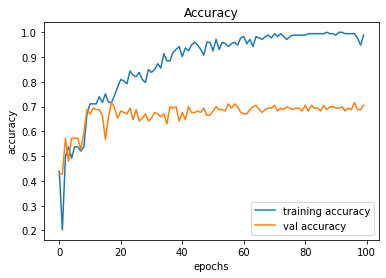

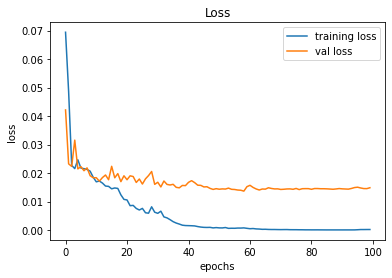

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 3s 1s/step - loss: 0.0143 - accuracy: 0.7816


[0.014322505332529545, 0.7816091775894165]

In [ ]:
model.save("number_plate_detection.h5")

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[:5]

array([[0.6504395 , 0.69674426, 0.47870913, 0.6124741 ],
       [0.30315697, 0.693096  , 0.21970676, 0.6677398 ],
       [0.5591798 , 0.6986769 , 0.41661873, 0.63451856],
       [0.55192614, 0.4985397 , 0.4648715 , 0.43684143],
       [0.7895066 , 0.7314028 , 0.6773613 , 0.57379776]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

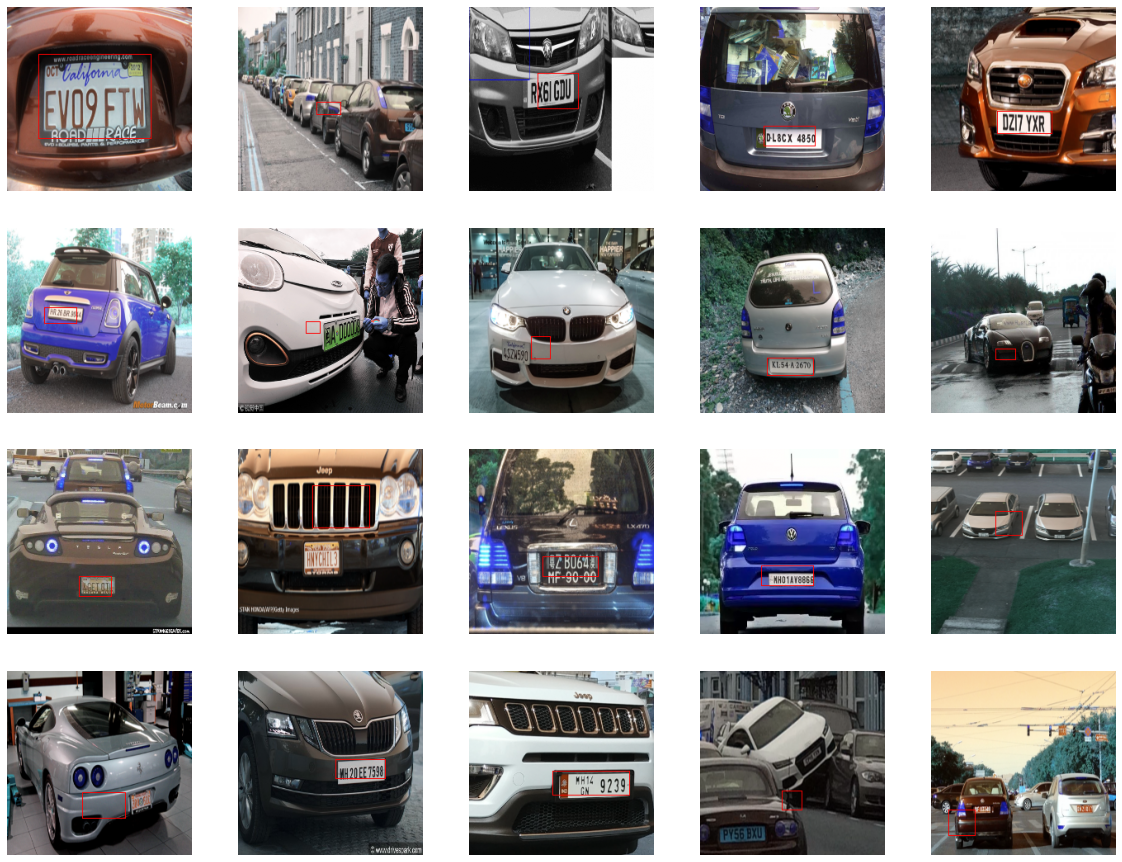

In [ ]:
plt.figure(figsize=(20,40))
for i in range(20,40) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = predictions[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(255, 0, 0))
    plt.imshow(image)